C:\Users\saavedrak\AppData\Local\Continuum\anaconda3\envs\ml_expense\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 1) EUBF                           0.288297
 2) YEAR                           0.227014
 3) DELTA_RAISE                    0.221396
 4) DISC                           0.111340
 5) FOOD                           0.087037
 6) MONTH                          0.051426
 7) EMPLYR                         0.009259
 8) ACTIVE_RET                     0.004231
 9) ACTIVE_LOANS                   0.000000


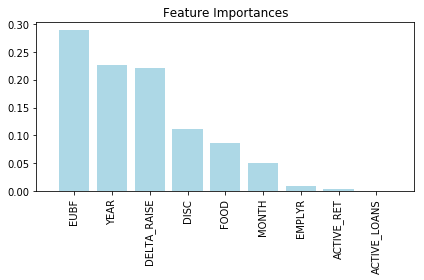

0.8 predictive accuracy.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)  
df = pd.read_csv('data/purchases2.csv')

df_sample = df.sample(n=15)
y = np.asarray(df_sample['DISP_RANGE'], dtype="|S6")

# Columns to include in sample
cols = df_sample[['MONTH', 'YEAR', '', 'DISC', 'EUBF', 'ACTIVE_LOANS', 'DELTA_RAISE', 'EMPLYR', 'ACTIVE_RET']]
# Columns to analyze feature importances
cat_columns = ['MONTH', 'YEAR', 'DISC', 'EUBF', 'ACTIVE_LOANS', 'DELTA_RAISE', 'EMPLYR', 'ACTIVE_RET']


for column in cat_columns:
    categorical_mapping = {label: idx for idx, label in enumerate(np.unique(cols['{0}'.format(column)]))}
    cols['{0}'.format(column)] = cols['{0}'.format(column)].map(categorical_mapping)

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
    
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X = cols.iloc[:, :].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#DETERMINE FEATURE IMPORTANCES

from sklearn.ensemble import RandomForestClassifier

feat_labels = cols.columns[:]

forest = RandomForestClassifier(n_estimators=20,
                                random_state=0,
                                n_jobs=-1) # -1 sets n_jobs=n_CPU cores

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1) # -1 sets n_jobs=n_CPU cores

forest.fit(X_train, y_train)
y_predict = forest.predict(X)
y_actual = y

print(str(accuracy_score(y_actual, y_predict)) + " predictive accuracy.")
